Please insert deltax: 3
Please insert deltay: 4
Please insert x0: 0
Please insert y0: 0


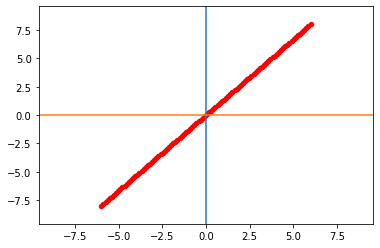

Please insert degree(s) to rotate: -60
Please insert the unit(s) of x-direction transform: 3
Please insert the unit(s) of y-direction transform: 4


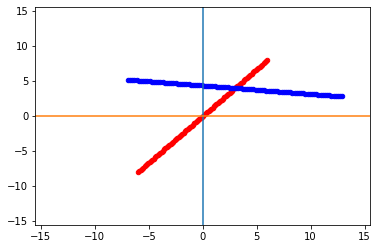

[[ 0.5        0.8660254  3.       ]
 [-0.8660254  0.5        4.       ]
 [ 0.         0.         1.       ]]


In [6]:
import numpy as npy
import matplotlib.pyplot as plt
import math

def transform(a, b):            #    returns a 3x3 matrix  
    returnval = npy.zeros(shape=(3, 3))
    returnval = [[1, 0, a], [0, 1, b], [0, 0, 1]]
    return returnval

def rotate(theta):
    theta = theta/360*math.pi*2
    returnval = npy.zeros(shape=(3, 3))
    returnval = [[math.cos(theta), -math.sin(theta), 0], [math.sin(theta), math.cos(theta), 0], [0, 0, 1]]
    return returnval

if __name__ == '__main__':
    buf = 0
    while(buf == 0):
        deltax = float(input("Please insert deltax: "))
        deltay = float(input("Please insert deltay: "))
        buf = math.pow(deltax, 2)+math.pow(deltay, 2)
    buf = math.pow(buf, 0.5)
    deltax /= buf
    deltay /= buf
    x0 = float(input("Please insert x0: "))
    y0 = float(input("Please insert y0: "))
    
    x = npy.linspace(x0-10*deltax, x0+10*deltax, 100)
    y = npy.linspace(y0-10*deltay, y0+10*deltay, 100)
    max_ = 0
    
    points = []            #    homogeneous coordinates array
    
    for i in range(0, 100):
        plt.scatter(x[i], y[i], 20, 'r')
        if(abs(x[i]) > max_):
            max_ = abs(x[i])
        if(abs(y[i]) > max_):
            max_ = abs(y[i])
        points.append([x[i], y[i], 1])
    plt.xlim(-max_*1.2, max_*1.2)        #    re-range the chart
    plt.ylim(-max_*1.2, max_*1.2)        #    re-range the chart
    plt.plot([0, 0], [-max_*1.2, max_*1.2])        #    draw the y-axis
    plt.plot([-max_*1.2, max_*1.2], [0, 0])        #    draw the x-axis
    
    plt.show()
    
    ############    Part 1 finished.    ############
    
    theta = float(input("Please insert degree(s) to rotate: "))
    deltax = float(input("Please insert the unit(s) of x-direction transform: "))
    deltay = float(input("Please insert the unit(s) of y-direction transform: "))
    
    transform_matrix = npy.eye(3)       #    Identity matrix 
    transform_matrix = transform_matrix.dot(transform(deltax, deltay))       #    transform every points by x+0, y-5.
    transform_matrix = transform_matrix.dot(rotate(theta))             #    rotate every points about (0, 0) for 45 degrees.
    
    for i in range(0, 100):
        plt.scatter(x[i], y[i], 20, 'r')
    
    for point in points:
        point = transform_matrix.dot(point)
        plt.scatter(point[0], point[1], 20, 'b')
        if(abs(point[0]) > max_):
            max_ = abs(point[0])
        if(abs(point[1]) > max_):
            max_ = abs(point[1])
    
    plt.xlim(-max_*1.2, max_*1.2)        #    re-range the chart
    plt.ylim(-max_*1.2, max_*1.2)        #    re-range the chart
    plt.plot([0, 0], [-max_*1.2, max_*1.2])        #    draw the y-axis
    plt.plot([-max_*1.2, max_*1.2], [0, 0])        #    draw the x-axis
    plt.show()
    
    ############    Part 2 finished.    ############
    
    print(transform_matrix)